# Stacking regression example

**Example using the stacking linear regression function in the stepAIC module**

The **stacking** function in the stepAIC module provides output of regression models and summary statistics using the sklearn StackingRegressor function for ensemble modeling with any combination of sklearn base regressors which can be turned 'on' or 'off' with the following optional keyword arguments:

- Lasso= 'on' (default) or 'off'        uses LassoCV
- Ridge= 'on' (default) or 'off'        uses RidgeCV
- ElasticNet= 'on' (default) or 'off'   uses ElasticNetCV
- SGD= 'on' (default) or 'off'          uses SGDRegressor
- KNN= 'on' (default) or 'off'          uses KNeighborsRegressor
- SVR= 'on' (default) or 'off'          uses SVR(kernel='rbf')
- MLP= 'on' or 'off' (default)          uses MLPRegressor
- XGB= 'on' (default) or 'off'          uses GradientBoostingRegressor
- DecisionTree= 'on' (default) or 'off' uses DecisionTreeRegressor
- RandomForest= 'on' (default) or 'off' uses RandomForestRegressor

The **stacking** function standardizes the X input by default. 

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the stepAIC module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [1]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

In this example we will use the diabetes data set from sklearn

In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Next, we will use the **stacking** function in stepAIC to fit the Stacking regression models and display the summary statistics of the regression results for the best fit models, as well as the best-fit coefficients of each model.

Fitting StackingRegressor models, please wait ...


StackingRegressor statistics of fitted ensemble model in model_outputs['stats']:


| Statistic          |   StackingRegressor |
|:-------------------|--------------------:|
| r-squared          |         0.569879    |
| adjusted r-squared |         0.5599      |
| n_samples          |       442           |
| df residuals       |       432           |
| df model           |         9           |
| F-statistic        |        63.5966      |
| Prob (F-statistic) |         1.11022e-16 |
| RMSE               |        50.5031      |
| Log-Likelihood     |     -2360.71        |
| AIC                |      4741.42        |
| BIC                |      4782.33        |


Strength coefficients of base_regressors in model_outputs['strength']:


- positive intercept suggests base models under-predict target
- negative intercept suggests base models over-predict target
- positive coefficients have high importance
- coefficients near zero have low i

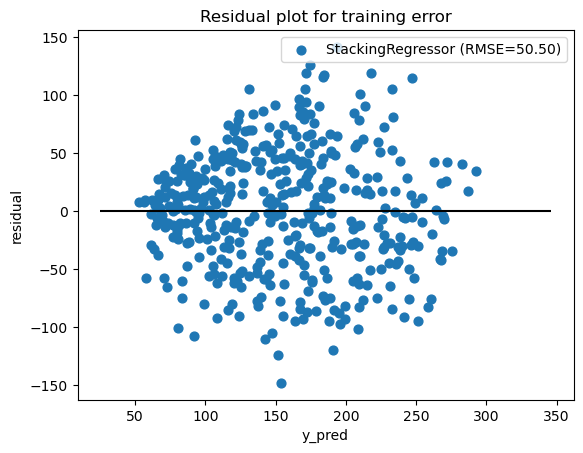

In [3]:
from stepAIC import stacking

model_objects, model_outputs = stacking(X, y)